# Task 1: Data Cleaning & Preprocessing – Titanic Dataset
Dataset: Titanic-Dataset.csv 

## Load Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:

df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic Info & Missing Values

In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handle Missing Values

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


## Drop Irrelevant Columns

In [9]:

df.drop(['Cabin','Name','Ticket','PassengerId'], axis=1, inplace=True)


## Encode Categorical Variables

In [10]:

df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## Outlier Visualization

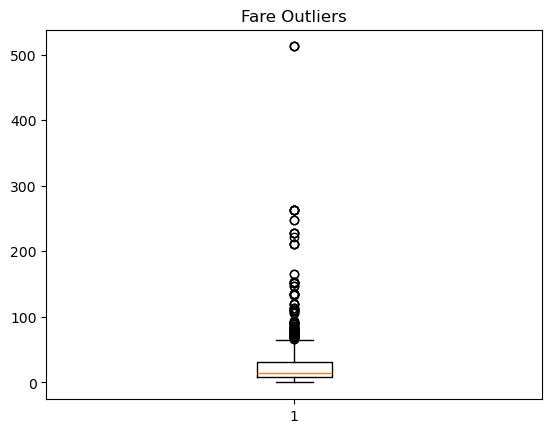

In [11]:

plt.boxplot(df['Fare'])
plt.title("Fare Outliers")
plt.show()


## Feature Scaling

In [12]:

scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])


## Final Cleaned Dataset

In [13]:

df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.502445,True,False,True
1,1,1,0.663861,1,0,0.786845,False,False,False
2,1,3,-0.258337,0,0,-0.488854,False,False,True
3,1,1,0.433312,1,0,0.420730,False,False,True
4,0,3,0.433312,0,0,-0.486337,True,False,True



## Conclusion

Performed data cleaning on Titanic Dataset:
- Handled missing values
- Encoded categorical variables
- Removed irrelevant columns
- Visualized outliers
- Applied standardization

Dataset is now ML-ready.
